In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats

In [2]:
df_fifa_data = pd.read_csv('D:\\Abhinav\\Learning\\Great Learning\\STATS FOR ML\\Mini Project\\Stats_mini_question\\fifa_stats.csv')
df_fifa_data.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [3]:
df_fifa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      2000 non-null   object 
 1   Age                       2000 non-null   int64  
 2   Nationality               2000 non-null   object 
 3   Overall_rating            2000 non-null   int64  
 4   Potential                 2000 non-null   int64  
 5   Club                      1981 non-null   object 
 6   Preferred Foot            2000 non-null   object 
 7   International Reputation  2000 non-null   int64  
 8   Weak Foot                 2000 non-null   int64  
 9   Skill Moves               2000 non-null   int64  
 10  Work Rate                 2000 non-null   object 
 11  Position                  2000 non-null   object 
 12  Jersey Number             2000 non-null   int64  
 13  Height                    2000 non-null   float64
 14  Weight  

In [4]:
df_fifa_data.isnull().sum()

Name                         0
Age                          0
Nationality                  0
Overall_rating               0
Potential                    0
Club                        19
Preferred Foot               0
International Reputation     0
Weak Foot                    0
Skill Moves                  0
Work Rate                    0
Position                     0
Jersey Number                0
Height                       0
Weight                       0
dtype: int64

In [5]:
# EDA
df_fifa_data.describe()

,Age,Overall_rating,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,27.231500,78.197000,80.303500,1.774500,3.204000,2.919500,15.205500,5.781042,169.478000
std,3.859061,3.285969,4.114104,0.811775,0.728457,0.964098,13.210508,0.443337,16.050306
min,17.000000,75.000000,75.000000,1.000000,1.000000,1.000000,1.000000,5.083333,123.000000
25%,24.000000,76.000000,77.000000,1.000000,3.000000,2.000000,7.000000,5.500000,159.000000
50%,27.000000,77.000000,80.000000,2.000000,3.000000,3.000000,12.000000,6.000000,170.000000
75%,30.000000,80.000000,83.000000,2.000000,4.000000,4.000000,20.000000,6.166667,181.000000
max,41.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,6.583333,227.000000


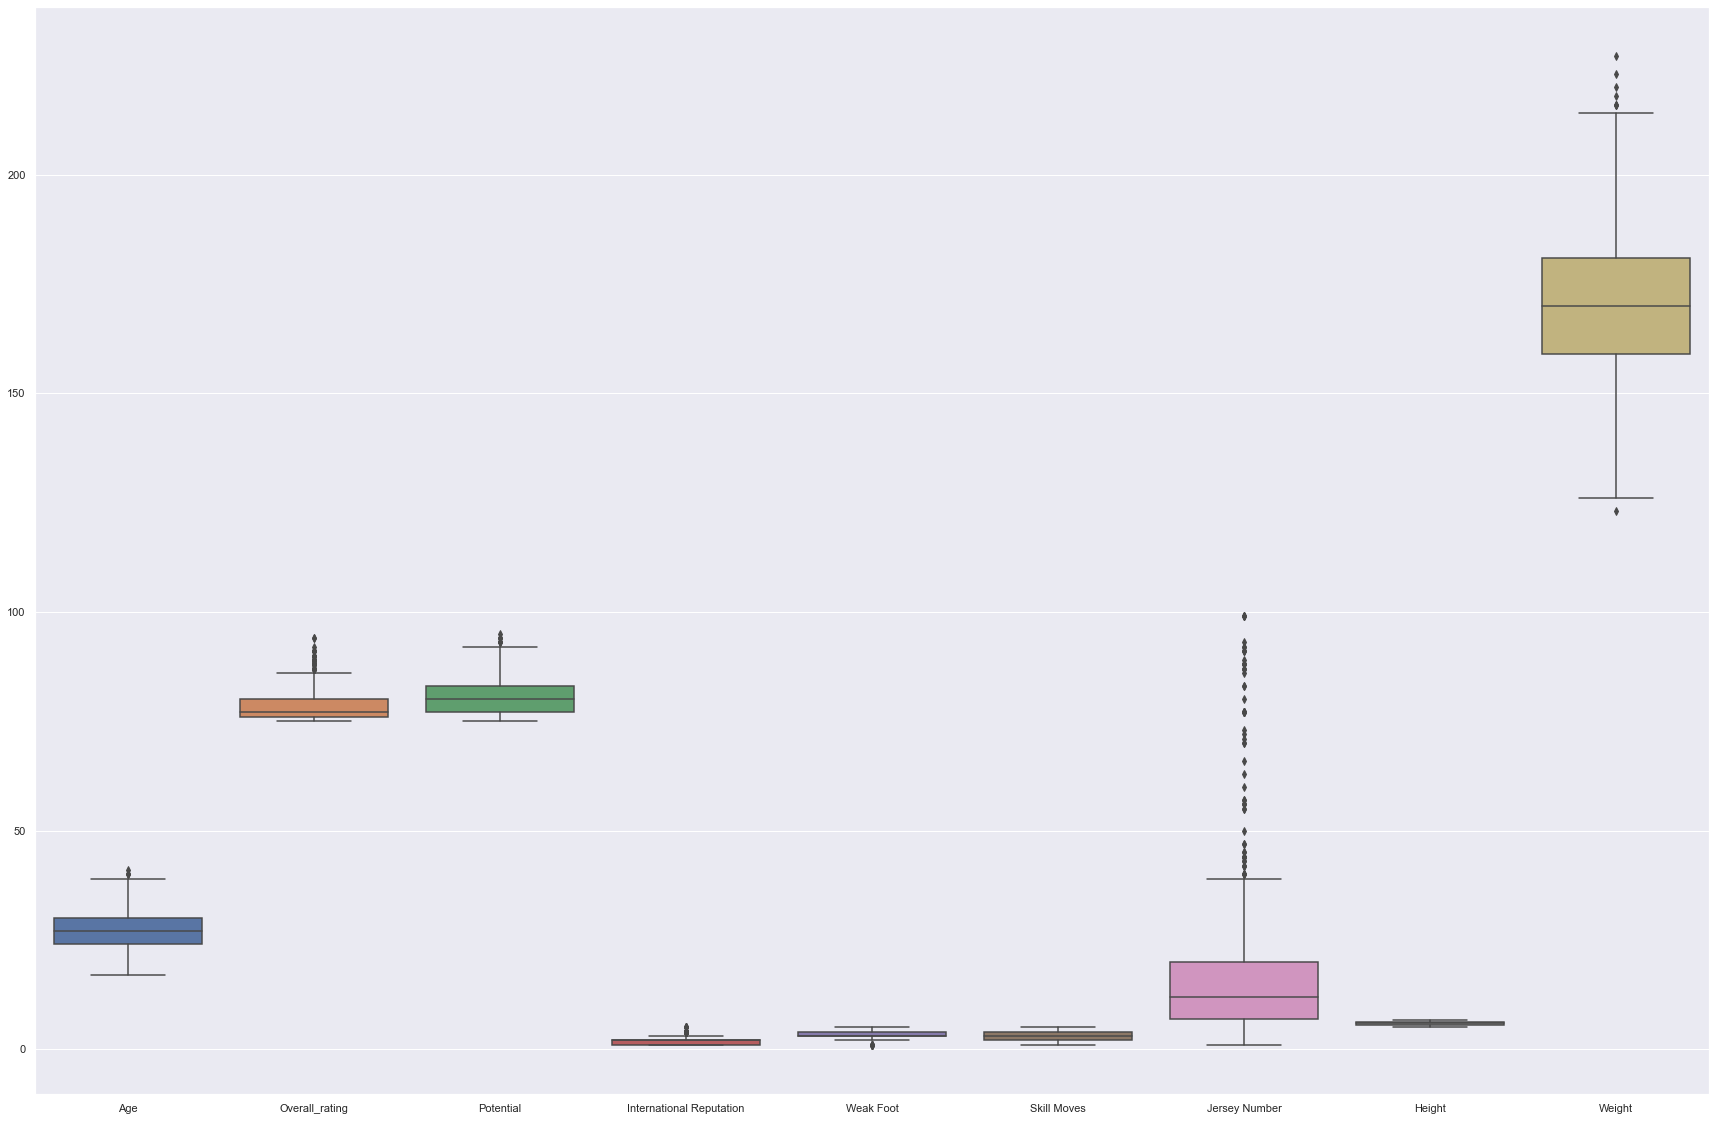

In [6]:
plt.figure(figsize=(30,20))
sns.boxplot(data=df_fifa_data)
plt.show()

In [7]:
df_fifa_data.skew()

Age                         0.197101
Overall_rating              1.370811
Potential                   0.673408
International Reputation    0.854724
Weak Foot                   0.069733
Skill Moves                -0.358327
Jersey Number               2.839025
Height                     -0.539604
Weight                      0.156247
dtype: float64

In [8]:
df_fifa_data.kurtosis()

Age                         -0.340728
Overall_rating               1.840560
Potential                   -0.179285
International Reputation     0.322607
Weak Foot                    0.017079
Skill Moves                 -0.455963
Jersey Number               12.386067
Height                      -1.102945
Weight                      -0.067046
dtype: float64

In [9]:
df_fifa_data['Club'].nunique()

285

In [10]:
df_fifa_data.corr()

,Age,Overall_rating,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight
Age,1.000000,0.063348,-0.511339,0.314808,-0.060940,-0.206624,-0.039370,0.065510,0.151674
Overall_rating,0.063348,1.000000,0.732695,0.661603,0.103579,0.081593,-0.094865,0.041815,0.055342
Potential,-0.511339,0.732695,1.000000,0.327717,0.099179,0.127366,-0.037827,0.030624,-0.017228
International Reputation,0.314808,0.661603,0.327717,1.000000,0.105748,0.088652,-0.032622,0.041700,0.071167
Weak Foot,-0.060940,0.103579,0.099179,0.105748,1.000000,0.342505,0.038840,-0.187942,-0.201137
Skill Moves,-0.206624,0.081593,0.127366,0.088652,0.342505,1.000000,0.065322,-0.472939,-0.528310
Jersey Number,-0.039370,-0.094865,-0.037827,-0.032622,0.038840,0.065322,1.000000,0.005081,-0.015377
Height,0.065510,0.041815,0.030624,0.041700,-0.187942,-0.472939,0.005081,1.000000,0.544016
Weight,0.151674,0.055342,-0.017228,0.071167,-0.201137,-0.528310,-0.015377,0.544016,1.000000


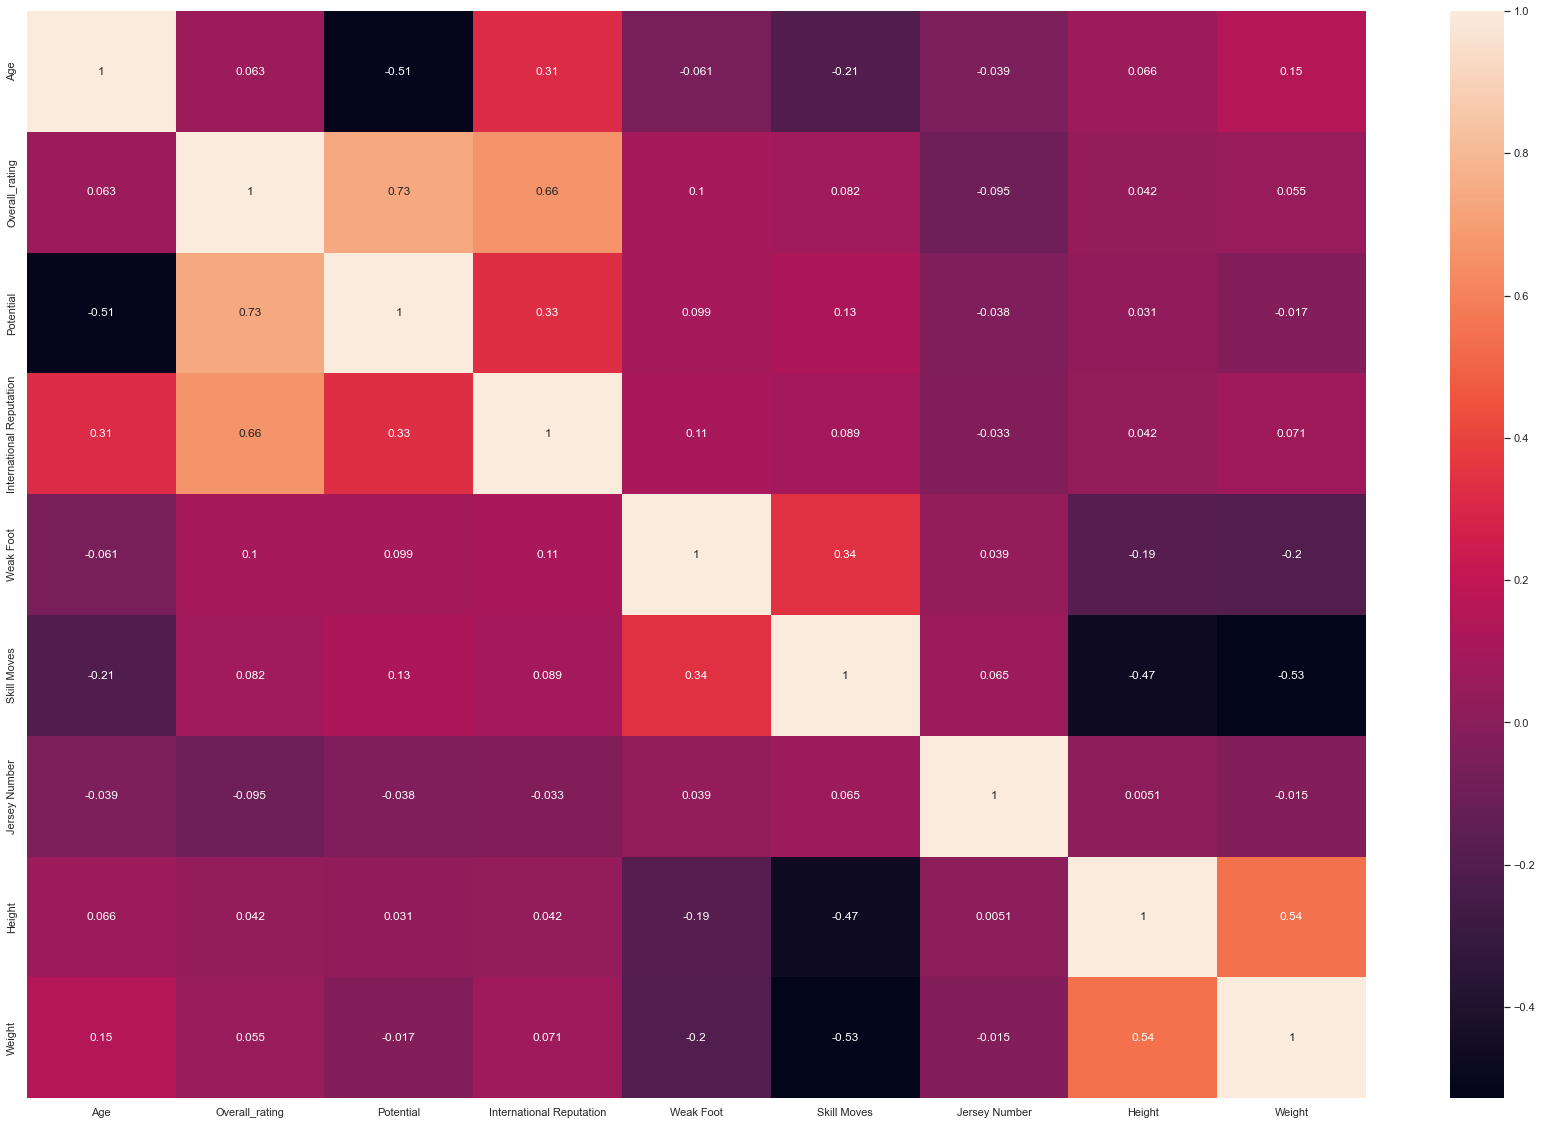

In [11]:
plt.figure(figsize=(30,20))
sns.heatmap(data=df_fifa_data.corr(),annot=True)
plt.show()

In [12]:
""""
a)Assuming age as population, perform the central limit theorem with sample size of 200.
Find the standard error and the mean of sampling distribution. 
Compare the results with population mean and standard deviation.
Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with 
an increase in sample size
"""

'"\na)Assuming age as population, perform the central limit theorem with sample size of 200.\nFind the standard error and the mean of sampling distribution. \nCompare the results with population mean and standard deviation.\nExplain in non-technical terms why the estimated standard error of a sample mean tends to decrease with \nan increase in sample size\n'

In [13]:
df_age = df_fifa_data['Age']
df_age

0       31
1       33
2       26
3       27
4       27
        ..
1995    22
1996    31
1997    22
1998    32
1999    28
Name: Age, Length: 2000, dtype: int64

In [14]:
sampling_mean = []
sample_size = 200
for i in range(sample_size):
    s =  np.random.choice(df_age,size=sample_size,replace=False)
    mean = np.mean(s)
    sampling_mean.append(mean)
    

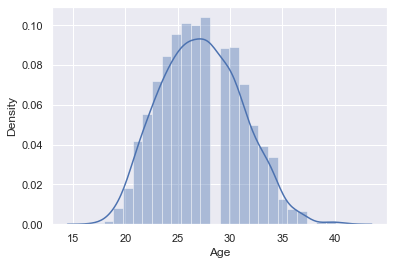

In [15]:
sns.distplot(df_age)
plt.show()

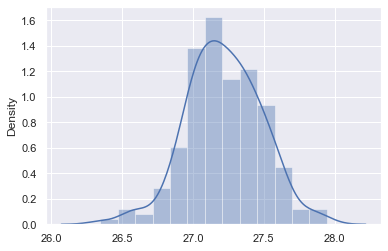

In [16]:
sns.distplot(sampling_mean)
plt.show()

In [17]:
print('Mean of population ',np.mean(df_age))
print('Mean of Sample ',np.mean(sampling_mean))

Mean of population  27.2315
Mean of Sample  27.2179


In [18]:
print('Standard Deviation of population ',df_age.skew())
print('Standard Deviation of Sample ',np.std(sampling_mean))
print('Standard error of Sample ',np.std(df_age)/(np.sqrt(len(sampling_mean))))

Standard Deviation of population  0.19710128351974346
Standard Deviation of Sample  0.2633212676560706
Standard error of Sample  0.2728086119425111


In [19]:
print('Skewness of population ',df_age.skew())
print('Skewness of Sample ',pd.Series(sampling_mean).skew())

Skewness of population  0.19710128351974346
Skewness of Sample  -0.09612803146655903


The estimated standard error of a sample mean tends to decrease with an increase in sample size increase and it gets closer of the true size the mean of sample get more closer to mean of population.

In [20]:
# b) Is there any evidence that the players overall rating is greater than 80?

In [21]:
stats.shapiro(df_fifa_data['Overall_rating'])

ShapiroResult(statistic=0.8525537848472595, pvalue=1.0221183102662362e-39)

In [22]:
df_fifa_data['Overall_rating'].skew()

1.3708105719374064

In [23]:
df_fifa_data['Overall_rating'].min()

75

In [24]:
df_fifa_data['Overall_rating'].mean()

78.197

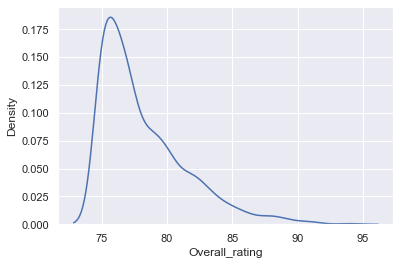

In [25]:
sns.distplot(df_fifa_data['Overall_rating'],hist=False)
plt.show()

In [ ]:
# Hypothesis

# H0:
# overall rating =< 80

# H1:
# overall rating > 80


# Right tail

In [39]:
mu = 80
x_bar = df_fifa_data['Overall_rating'].mean()

x_bar

78.197

In [ ]:
std = df_fifa_data['Overall_rating'].std()

n  = len(df_fifa_data['Overall_rating'])

se = std/(n**0.5)

se

In [30]:
stats.ttest_1samp(df_fifa_data['Overall_rating'],popmean=x_bar,alternative='less')

Ttest_1sampResult(statistic=0.0, pvalue=0.5)

In [37]:
tstats =  (x_bar  - mu)/se
tstats

-24.538460498672645

In [41]:
pvalue = stats.t.cdf(tstats,df=n-1)
pvalue

9.42688390153192e-117

In [40]:
stats.t.interval(0.95,df=1,loc=x_bar,scale=se)

(77.2633926475328, 79.13060735246721)

In [113]:
# From above value we can conclude we reject null hypothesis
# There are some value for Overall_rating column are less than 80 are present.

In [114]:
# c
#Perform the statistical test to identify whether preferred foot has any impact on potential. 
# Also, perform the graphical analysis.

df_fifa_data.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [115]:
df_fifa_data['Preferred Foot'].value_counts()

Right    1534
Left      466
Name: Preferred Foot, dtype: int64

In [116]:
# Hypothesis

# H0
# There is no impact

# H1
# There is impact

In [117]:
df1 = df_fifa_data[df_fifa_data['Preferred Foot']=='Left']['Overall_rating']
df2 = df_fifa_data[df_fifa_data['Preferred Foot'] == 'Right']['Overall_rating']

In [118]:
mu1 = 0
mu2 = 0

In [119]:
tstats,pvalue = stats.ttest_ind(df1,df2)
tstats,pvalue

(0.5021014132934408, 0.6156515133764027)

In [120]:
alpha = 0.05

if pvalue > alpha:
    print('Fail to reject H0')
else :
    print('Reject H0')

Fail to reject H0


In [121]:
x_bar1 = np.mean(df1)
x_bar2 = np.mean(df2)

std1 = np.std(df1)
std2 = np.std(df2)

n1 = len(df1)
n2 = len(df2)

In [122]:
s =  np.sqrt((((n1-1)*std1**2) + ((n2-1)*std2**2))/(n1+n2-2))
s

3.284902912046342

In [123]:
stats.t.interval(0.95,df=n1+n2-2,loc=x_bar1-x_bar2,scale= s*np.sqrt((1/n1)+(1/n2)))

(-0.25346954410522543, 0.4280418983531395)

In [124]:
samp_avg_1 = np.mean(df1)
samp_avg_2 = np.mean(df2)

samp_std_1 = np.std(df1)
samp_std_2 = np.std(df2)

n_1 = len(df1)
n_2 = len(df2)

In [125]:
s = np.sqrt((((n_1-1)*samp_std_1**2) + ((n_2-1)*samp_std_2**2)) / (n_1 + n_2 - 2))
s

3.284902912046342

In [126]:
interval = stats.t.interval(0.95, df = n_1 + n_2 - 2, loc = samp_avg_1 - samp_avg_2, scale = s * (np.sqrt((1/n_1) + (1/n_2))))
interval

(-0.25346954410522543, 0.4280418983531395)

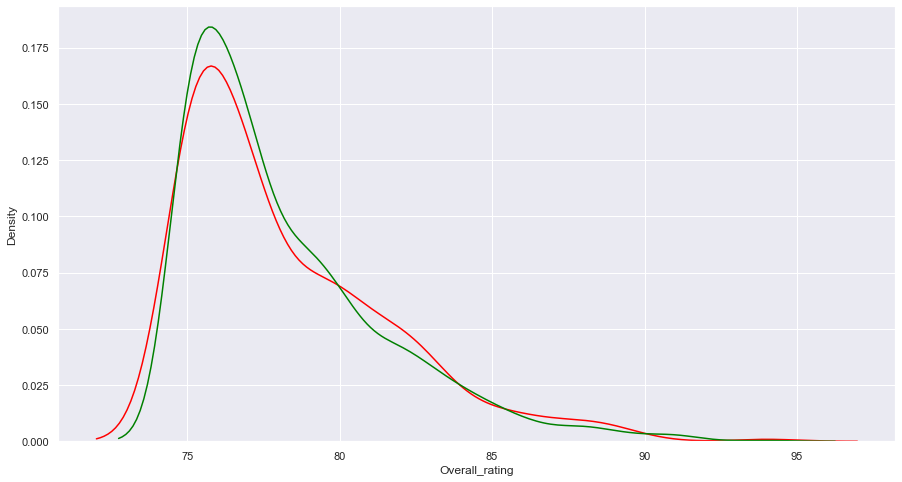

In [140]:
plt.rcParams['figure.figsize'] = [15,8]
sns.distplot(df1,color='Red',hist=False)
sns.distplot(df2,color='Green',hist=False)

plt.show()

In [128]:
# d) Perform the statistical test to identify the relation between the overall rating and potential. 
# [Assume both are continuous data points].

In [129]:
df3 = df_fifa_data[['Overall_rating','Potential']]
df3.corr()

,Overall_rating,Potential
Overall_rating,1.000000,0.732695
Potential,0.732695,1.000000


In [130]:
stats.shapiro(df3['Overall_rating'])

ShapiroResult(statistic=0.8525537848472595, pvalue=1.0221183102662362e-39)

In [131]:
stats.shapiro(df3['Potential'])

ShapiroResult(statistic=0.9384800791740417, pvalue=5.016414837142018e-28)

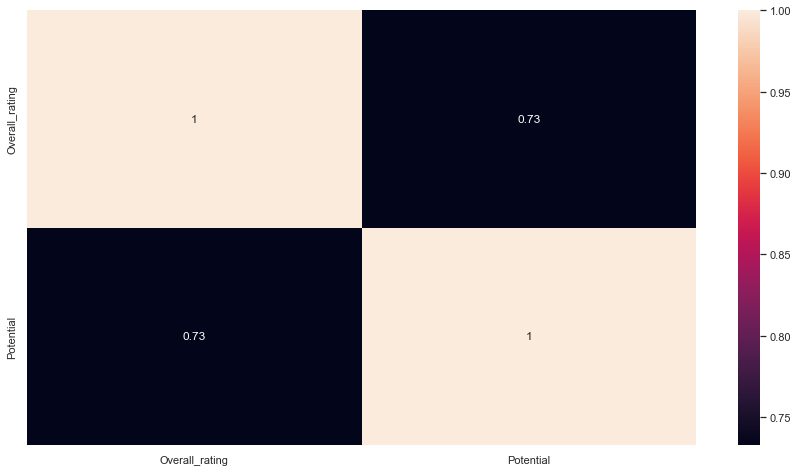

In [132]:
sns.heatmap(df3.corr(),annot=True)
plt.show()

In [133]:
# There is strong positive correlation between Potential correlation

In [134]:
# e) Does skill move have any effect in overall rating. 
# Perform the graphical analysis and the statistical analysis.

In [ ]:
# we use one way ANOVA test

In [135]:
# Hypothesis
# H0
# All mean are same
# H1
# anyone of the mean is different

In [136]:
df_fifa_data['Skill Moves'].value_counts()

3    828
4    544
2    395
1    194
5     39
Name: Skill Moves, dtype: int64

In [137]:
group1 = df_fifa_data[df_fifa_data['Skill Moves'] == 1]['Overall_rating']
group2 = df_fifa_data[df_fifa_data['Skill Moves'] == 2]['Overall_rating']
group3 = df_fifa_data[df_fifa_data['Skill Moves'] == 3]['Overall_rating']
group4 = df_fifa_data[df_fifa_data['Skill Moves'] == 4]['Overall_rating']
group5 = df_fifa_data[df_fifa_data['Skill Moves'] == 5]['Overall_rating']

In [138]:
fstatistics,pvalue = stats.kruskal(group1,group2,group3,group4,group5)
fstatistics,pvalue 

(104.85780927711181, 9.082225777036205e-22)

In [141]:
# since pvalue is less than alpha so we can say that skill moves will have affect overall rating as average of any one sample

In [142]:
stats.f_oneway(group1,group2,group3,group4,group5)

F_onewayResult(statistic=31.085141826531746, pvalue=3.8236370526660514e-25)

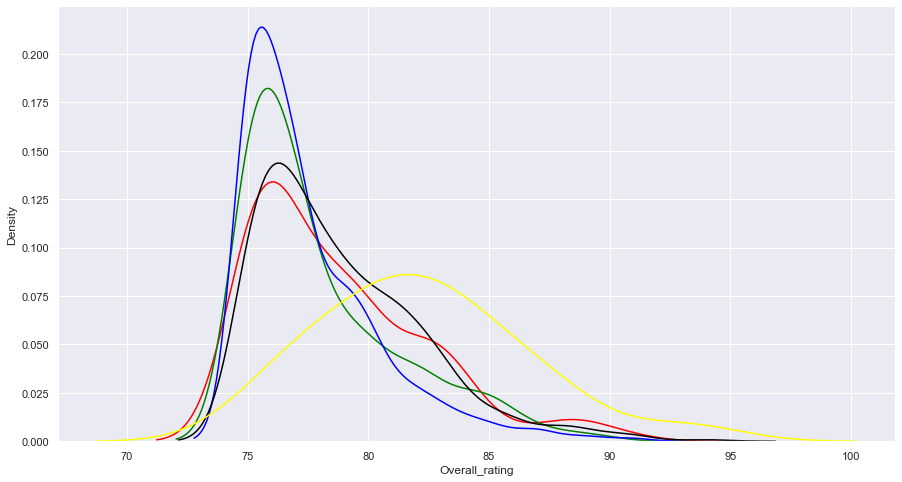

In [143]:
sns.distplot(group1,color='red',hist=False)
sns.distplot(group2,color='green',hist=False)
sns.distplot(group3,color='blue',hist=False)
sns.distplot(group4,color='black',hist=False)
sns.distplot(group5,color='yellow',hist=False)
plt.show()

In [144]:
# 2. Perform the following statistical analysis on the mobile network dataset given. The given data set contains 
# information about the internet, calls, messages of various network.
#Data Cleaning and basic EDA process needs to be performed. phone.csv

In [145]:
df_phone = pd.read_csv('D:\\Abhinav\\Learning\\Great Learning\\STATS FOR ML\\Mini Project\\Stats_mini_question\\phone.csv')
df_phone.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [146]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          820 non-null    object 
 1   duration      820 non-null    float64
 2   item          820 non-null    object 
 3   month         820 non-null    object 
 4   network       820 non-null    object 
 5   network_type  820 non-null    object 
dtypes: float64(1), object(5)
memory usage: 38.6+ KB


In [147]:
df_phone.describe()

,duration
count,820.000000
mean,144.304936
std,45.687777
min,0.993514
25%,112.916486
50%,144.179434
75%,175.932308
max,268.458090


In [148]:
df_phone.isnull().sum()

date            0
duration        0
item            0
month           0
network         0
network_type    0
dtype: int64

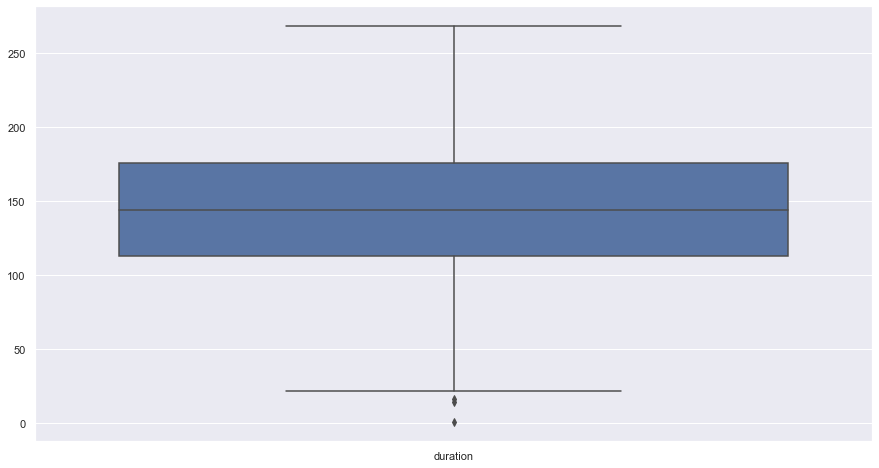

In [149]:
sns.boxplot(data = df_phone)
plt.show()

In [157]:
# a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by 
# all the network. Which of the Intervals are wider? Interpret the results.

# 95% Confidence Interval

x_bar = np.mean(df_phone['duration'])

std = np.std(df_phone['duration'])

n =  df_phone.shape[0]

alpha = 0.05

# standard error
se = std/np.sqrt(n)

z = stats.norm.isf(alpha/2)

ll = x_bar - z*se
ul = x_bar + z*se

print("For 95% Confidence interval lower limit is ",ll," and upper limit is",ul)


# 99%
alpha = 0.01

z = stats.norm.isf(alpha/2)

ll = x_bar - z*se
ul = x_bar + z*se

print("For 99% Confidence interval lower limit is ",ll," and upper limit is",ul)

For 95% Confidence interval lower limit is  141.1797470762666  and upper limit is 147.4301240434043
For 99% Confidence interval lower limit is  140.1977416835259  and upper limit is 148.41212943614502


In [158]:
# Using builtin method
stats.norm.interval(0.95,loc=x_bar,scale=se)

(141.1797470762666, 147.4301240434043)

In [161]:
stats.norm.interval(0.99,loc=x_bar,scale=se)

(140.1977416835259, 148.41212943614502)

In [ ]:
# We can say that 95% of data for duration lies between 141 and 147
# and 99% of data for duration lies between 140 and 148

In [167]:
# b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.

print('Skewness for the duration is ',df_phone['duration'].skew())

Skewness for the duration is  0.005764422490882386


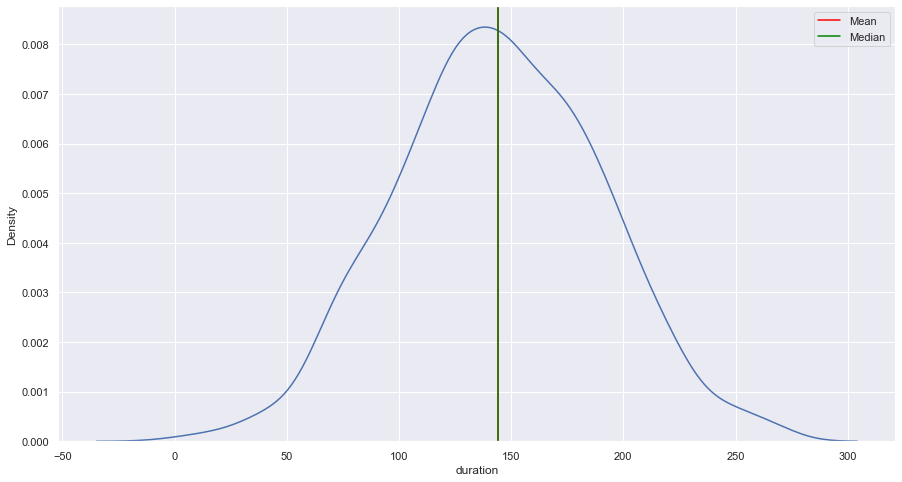

In [179]:
sns.distplot(df_phone['duration'],hist=False)
plt.axvline(df_phone['duration'].mean(),c='red',label='Mean')
plt.axvline(df_phone['duration'].median(),c='green',label='Median')
plt.legend()
plt.show()

In [ ]:
# We can see say from above conclusion that equally distributed.

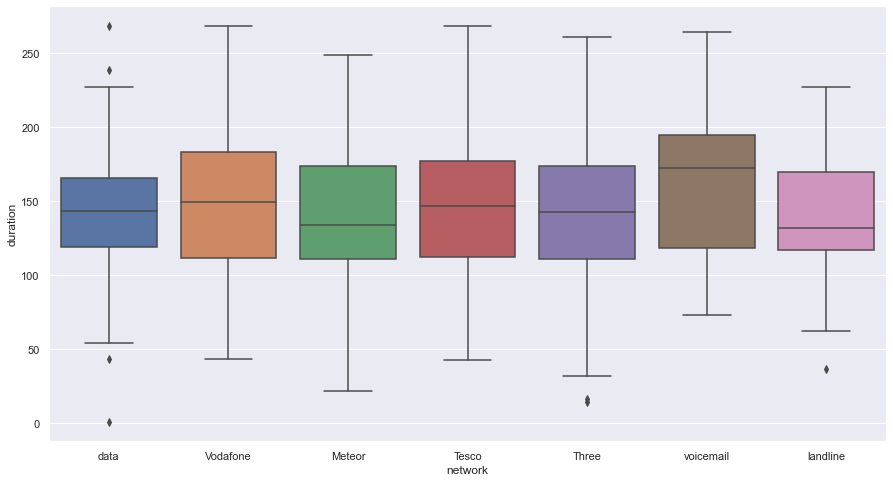

In [182]:
# c) Plot the distribution of duration with respect to each network in the same graph and Interpret the results from the graph.
sns.boxplot(data=df_phone,y='duration',x='network')
plt.show()

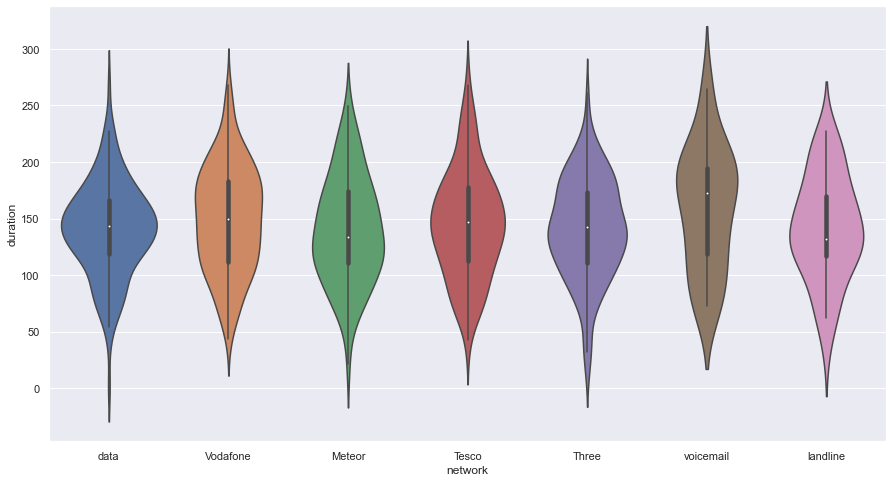

In [184]:
sns.violinplot(data=df_phone,y='duration',x='network')
plt.show()

In [ ]:
# We can say that for network data three and landline there is some outliers in duration due which there is may impact the
# overall mean for duration

In [154]:
# d) Perform statistical tests to identify the relation between item and duration. Detailed 
# explanation of relation between the classes is required.

In [185]:
df_phone['item'].value_counts()

call    388
sms     282
data    150
Name: item, dtype: int64

In [ ]:
# we use one way ANOVA test

In [186]:
group_call =  df_phone[df_phone['item'] == 'call']['duration']
group_sms = df_phone[df_phone['item'] == 'sms']['duration']
group_data = df_phone[df_phone['item'] == 'data']['duration']

In [190]:
alpha = 0.05

In [ ]:
# Hypothesis
# H0
# all the mean are same

#Ha
# anyone of the mean are not same

In [191]:
fstats,pvalue = stats.f_oneway(group_call,group_data,group_sms)
fstats,pvalue 

(1.9313964906864995, 0.1456068656611744)

In [ ]:
# since pvalue is greater than alpha so we fail to reject null so the all mean population are same

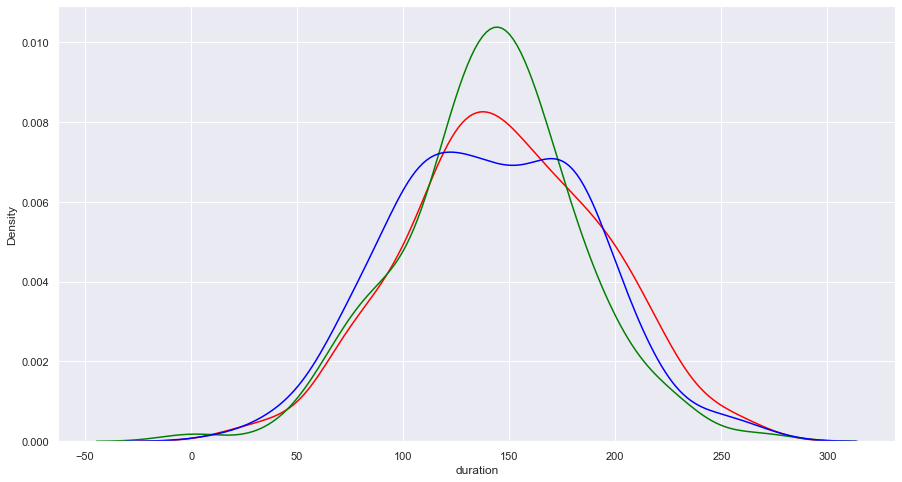

In [193]:
sns.distplot(group_call,color='red',hist=False)
sns.distplot(group_data,color='green',hist=False)
sns.distplot(group_sms,color='blue',hist=False)
plt.show()

In [194]:
 #e) Perform statistical tests to identify the relation between network and network_type. 
df_phone['network_type'].value_counts()    

mobile       601
data         150
landline      42
voicemail     27
Name: network_type, dtype: int64

In [197]:
group_mobile = df_phone[df_phone['network_type']=='mobile']['duration']
group_data = df_phone[df_phone['network_type'] == 'data']['duration']
group_landline = df_phone[df_phone['network_type']=='landline']['duration']
group_voicemail = df_phone[df_phone['network_type'] =='voicemail']['duration']

In [199]:
fstats,pvalue = stats.f_oneway(group_mobile,group_data,group_landline,group_voicemail)
fstats,pvalue

(1.2689957748859328, 0.28383269479347184)

In [ ]:
# since pvalue is greater than alpha so we fail reject null hypothesis so we can say that all the mean are same for all 
# network type